In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://datahub.io/core/covid-19/r/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

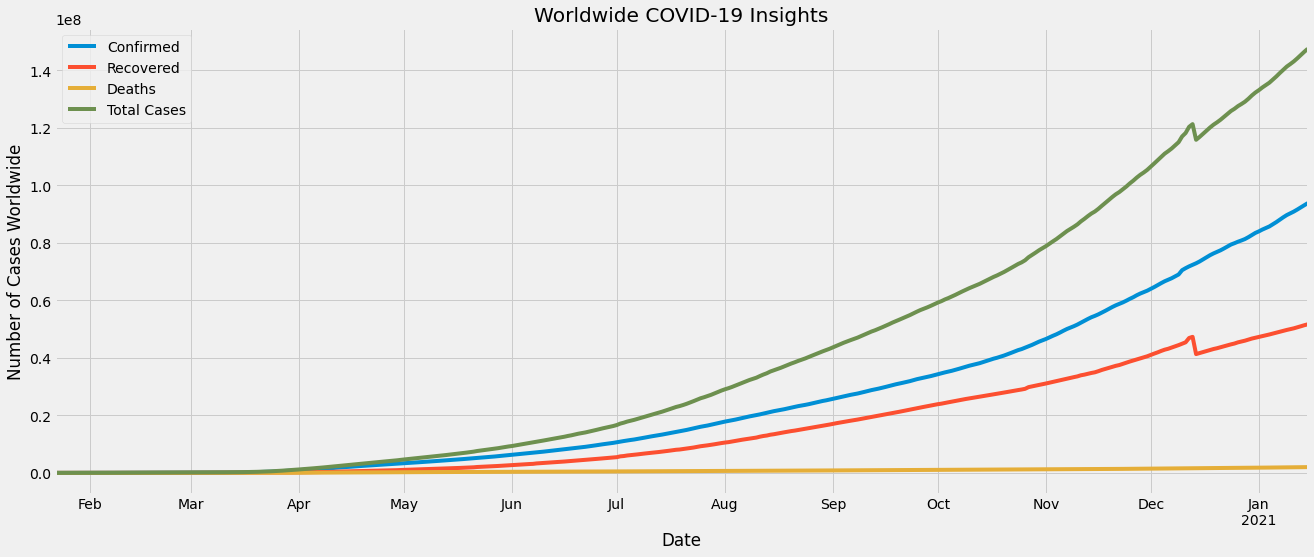

In [75]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(20, 8))
w.set_xlabel('Date')
w.set_ylabel('Number of Cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()

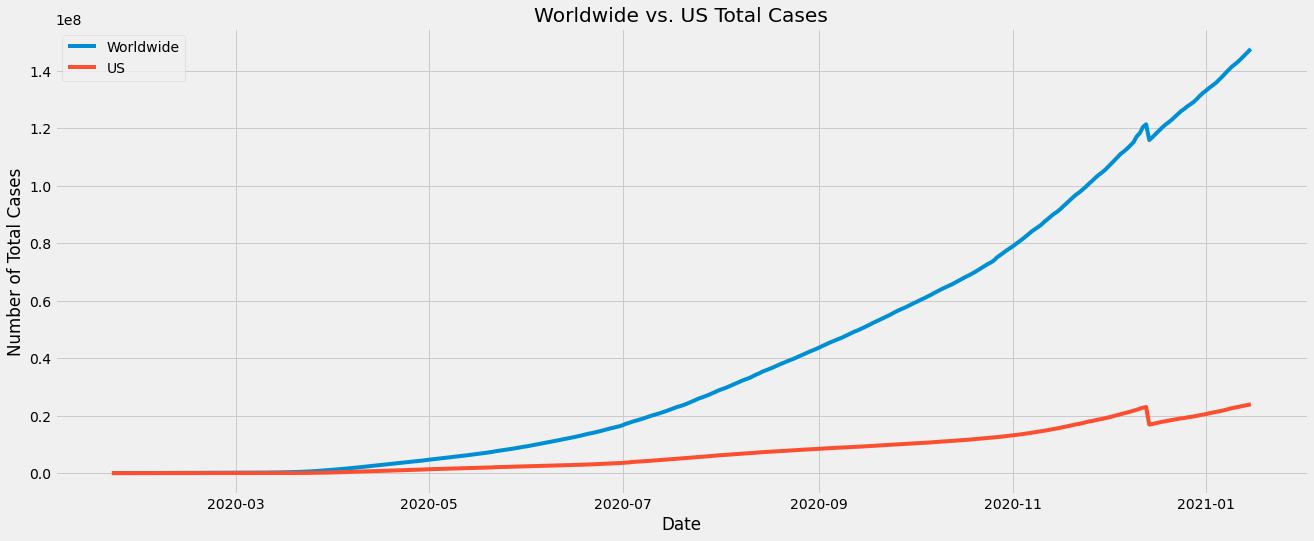

In [79]:
country = input('Enter the name of a country (for america enter "US")')

country_df = df[df['Country']==f'{country}'].groupby(['Date']).sum()

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(country_df[['Total Cases']], label=f'{country}')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Total Cases')
ax.title.set_text(f'Worldwide vs. {country} Total Cases')

plt.legend(loc='upper left')
plt.show()

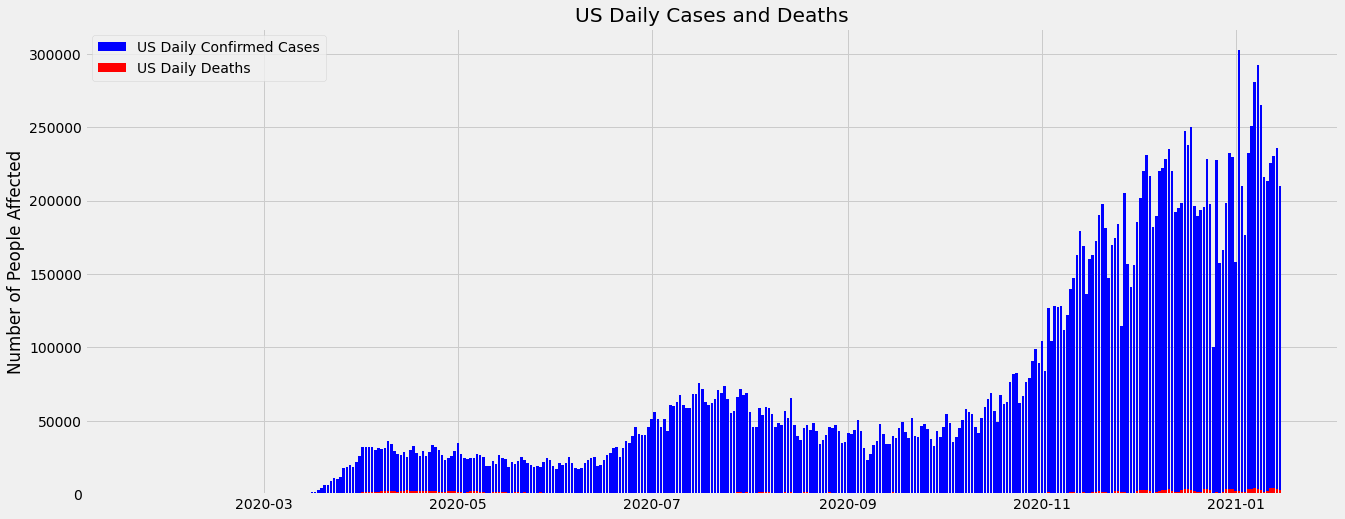

In [80]:
# Daily Cases and Deaths
country_df = country_df.reset_index()
country_df['Daily Confirmed'] = country_df['Confirmed'].sub(country_df['Confirmed'].shift())
country_df['Daily Deaths'] = country_df['Deaths'].sub(country_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(country_df['Date'], country_df['Daily Confirmed'], color='b', label=f'{country} Daily Confirmed Cases')
ax.bar(country_df['Date'], country_df['Daily Deaths'], color='r', label=f'{country} Daily Deaths')
ax.set_ylabel('Number of People Affected')
ax.title.set_text(f'{country} Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

In [ ]:
from datetime import date, timedelta